<font size=6>聚类算法</font>
# 聚类的定义
聚类，简单来说，就是将一个庞杂数据集中具有相似特征的数据自动归类到一起，称为一个簇，簇内的对象越相似，聚类的效果越好。它是一种无监督的学习(Unsupervised Learning)方法,不需要预先标注好的训练集。

# K-Means
**K-均值**是最普及的聚类算法，算法接受一个未标记的数据集，然后将数据聚类成不同的组。
## 算法
### 业务逻辑
**K-均值**是一个迭代算法，假设我们想要将数据聚类成**K**个组，其方法为:
1. 首先选择$K$个随机的点，称为**聚类中心**（**cluster centroids**）；
2. 对于数据集中的每一个数据，按照距离$K$个中心点的距离，将其与距离最近的中心点关联起来，与同一个中心点关联的所有点聚成一类。
3. 计算每一个组的平均值；
4. 将该组所关联的中心点移动到平均值的位置；
5. 重复步骤2-4直至中心点不再变化；

### 伪代码
用$μ^1$,$μ^2$,...,$μ^k$ 来表示聚类中心，用$c^{(1)}$,$c^{(2)}$,...,$c^{(m)}$来存储与第$i$个实例数据最近的聚类中心的索引，**K-均值**算法的伪代码如下：
```
Repeat {
for i = 1 to m
    c(i) := index (form 1 to K) of cluster centroid closest to x(i)
for k = 1 to K
    μk := average (mean) of points assigned to cluster k
}
```
算法分为两个步骤，第一个**for**循环是赋值步骤，即：对于每一个样例$i$，计算其应该属于的类。第二个**for**循环是聚类中心的移动，即：对于每一个类$K$，重新计算该类的质心。
<img src="images/fe6dd7acf1a1eddcd09da362ecdf976f.jpg">

## 优化目标
K-means优化问题，是要最小化所有的数据点与其所关联的聚类中心点之间的距离之和，因此
K-means的代价函数（又称**畸变函数** **Distortion function**）为：

$$J(c^{(1)},...,c^{(m)},μ_1,...,μ_K)=\dfrac {1}{m}\sum^{m}_{i=1}\left\|X^{\left( i\right) }-\mu_{c^{(i)}}\right\| ^{2}$$

其中${\mu_{c^{(i)}}}$代表与${x^{(i)}}$最近的聚类中心点。

## 数据归一化处理
$\large x_i=\frac{x_i-min(X)}{max(X)-min(X)}$

##  随机初始化
在运行K-均值算法的之前，我们首先要随机初始化所有的聚类中心点，下面介绍怎样做：
1. 我们应该选择$K<m$，即聚类中心点的个数要小于所有训练集实例的数量
2. 随机选择$K$个训练实例，然后令$K$个聚类中心分别与这$K$个训练实例相等

**K-均值**的一个问题在于，它有可能会停留在一个局部最小值处，而这取决于初始化的情况。
<img src="images/d4d2c3edbdd8915f4e9d254d2a47d9c7.png">

为了解决这个问题，我们通常需要多次运行**K-均值**算法，每一次都重新进行随机初始化，最后再比较多次运行**K-均值**的结果，选择代价函数最小的结果。这种方法在$K$较小的时候（2--10）还是可行的，但是如果$K$较大，这么做也可能不会有明显地改善。

## 选择聚类数
1. 根据问题场景确定；
2. “肘部法则”；

<img src="images/f3ddc6d751cab7aba7a6f8f44794e975.png">

## K-Means初始化优化K-Means++
K-Means++的对于初始化质心的优化策略也很简单，如下：

1. 从输入的数据点集合中随机选择一个点作为第一个聚类中心$μ_1$
1. 对于数据集中的每一个点$x_i$，计算它与已选择的聚类中心中最近聚类中心的距离:$D(x_i)=argmin{||x_i−μ_r||}^2_2,r=1,2,...k_{selected}$
1. 选择一个新的数据点作为新的聚类中心，选择的原则是：$D(x)$较大的点，被选取作为聚类中心的概率较大
1. 重复2和3直到选择出k个聚类质心
1. 利用这k个质心来作为初始化质心去运行标准的K-Means算法

## K-Means距离计算优化elkan K-Means
elkan K-Means利用了两边之和大于等于第三边,以及两边之差小于第三边的三角形性质，来减少距离的计算。

第一种规律是对于一个样本点$x$和两个质心$μ_{j_1},μ_{j_2}$。如果我们预先计算出了这两个质心之间的距离$D(j_1,j_2)$，则如果计算发现$2D(x,j_1)≤D(j_1,j_2)$,我们立即就可以知道$D(x,j_1)≤D(x,j_2)$。此时我们不需要再计算$D(x,j_2)$,也就是说省了一步距离计算。

第二种规律是对于一个样本点$x$和两个质心$μ_{j_1},μ_{j_2}$。我们可以得到$D(x,j_2)≥max({0,D(x,j_1)−D(j_1,j_2)})$。这个从三角形的性质也很容易得到。

## 大样本优化Mini Batch K-Means
在传统的K-Means算法中，要计算所有的样本点到所有的质心的距离。如果样本量非常大，比如达到10万以上，特征有100以上，此时用传统的K-Means算法非常的耗时，就算加上elkan K-Means优化也依旧。在大数据时代，这样的场景越来越多。此时Mini Batch K-Means应运而生。

顾名思义，Mini Batch，也就是用样本集中的一部分的样本来做传统的K-Means，这样可以避免样本量太大时的计算难题，算法收敛速度大大加快。当然此时的代价就是我们的聚类的精确度也会有一些降低。一般来说这个降低的幅度在可以接受的范围之内。

在Mini Batch K-Means中，我们会选择一个合适的批样本大小batch size，我们仅仅用batch size个样本来做K-Means聚类。那么这batch size个样本怎么来的？一般是通过无放回的随机采样得到的。

为了增加算法的准确性，我们一般会多跑几次Mini Batch K-Means算法，用得到不同的随机采样集来得到聚类簇，选择其中最优的聚类簇。

## scikit-learn的k-means算法
在scikit-learn中，包括两个K-Means的算法，一个是传统的K-Means算法，对应的类是KMeans。另一个是基于采样的Mini Batch K-Means算法，对应的类是MiniBatchKMeans。一般来说，使用K-Means的算法调参是比较简单的。

### KMeans类的主要参数有：

1. n_clusters: 即我们的k值，一般需要多试一些值以获得较好的聚类效果。
2. max_iter： 最大的迭代次数，一般如果是凸数据集的话可以不管这个值，如果数据集不是凸的，可能很难收敛，此时可以指定最大的迭代次数让算法可以及时退出循环。
3. n_init：用不同的初始化质心运行算法的次数。由于K-Means是结果受初始值影响的局部最优的迭代算法，因此需要多跑几次以选择一个较好的聚类效果，默认是10，一般不需要改。如果你的k值较大，则可以适当增大这个值。
4. init： 即初始值选择的方式，可以为完全随机选择'random',优化过的'k-means++'或者自己指定初始化的k个质心。一般建议使用默认的'k-means++'。
5. algorithm：有“auto”, “full” or “elkan”三种选择。"full"就是我们传统的K-Means算法， “elkan”是我们原理篇讲的elkan K-Means算法。默认的"auto"则会根据数据值是否是稀疏的，来决定如何选择"full"和“elkan”。一般数据是稠密的，那么就是 “elkan”，否则就是"full"。一般来说建议直接用默认的"auto"。

### MiniBatchKMeans类主要参数
MiniBatchKMeans类的主要参数比KMeans类稍多，主要有：

1. n_clusters: 即我们的k值。

2. max_iter：最大的迭代次数。

3. n_init：用不同的初始化质心运行算法的次数。这里和KMeans类意义稍有不同，KMeans类里的n_init是用同样的训练集数据来跑不同的初始化质心从而运行算法。而MiniBatchKMeans类的n_init则是每次用不一样的采样数据集来跑不同的初始化质心运行算法。

4. batch_size：即用来跑Mini Batch KMeans算法的采样集的大小，默认是100.如果发现数据集的类别较多或者噪音点较多，需要增加这个值以达到较好的聚类效果。

5. init： 即初始值选择的方式，和KMeans类的init意义一样。

6. init_size: 用来做质心初始值候选的样本个数，默认是batch_size的3倍，一般用默认值就可以了。

7. reassignment_ratio: 某个类别质心被重新赋值的最大次数比例，这个和max_iter一样是为了控制算法运行时间的。这个比例是占样本总数的比例，乘以样本总数就得到了每个类别质心可以重新赋值的次数。如果取值较高的话算法收敛时间可能会增加，尤其是那些暂时拥有样本数较少的质心。默认是0.01。如果数据量不是超大的话，比如1w以下，建议使用默认值。如果数据量超过1w，类别又比较多，可能需要适当减少这个比例值。具体要根据训练集来决定。

8. max_no_improvement：即连续多少个Mini Batch没有改善聚类效果的话，就停止算法， 和reassignment_ratio， max_iter一样是为了控制算法运行时间的。默认是10.一般用默认值就足够了。

### K值的评估标准
不像监督学习的分类问题和回归问题，我们的无监督聚类没有样本输出，也就没有比较直接的聚类评估方法。但是我们可以从簇内的稠密程度和簇间的离散程度来评估聚类的效果。常见的方法有轮廓系数Silhouette Coefficient和Calinski-Harabasz Index。Calinski-Harabasz分数值ss的数学计算公式是：
$$s(k)=\frac{tr(B_k)}{tr(W_k)}\times \frac{m-k}{k-1}$$

其中m为训练集样本数，$k$为类别数。$B_k$为类别之间的协方差矩阵，$W_k$为类别内部数据的协方差矩阵。$tr$为矩阵的迹。

也就是说，类别内部数据的协方差越小越好，类别之间的协方差越大越好，这样的Calinski-Harabasz分数会高。在scikit-learn中， Calinski-Harabasz Index对应的方法是metrics.calinski_harabaz_score.

### 案例
#### KMeans

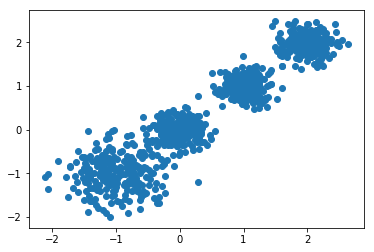

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets.samples_generator import make_blobs
# X为样本特征，Y为样本簇类别， 共1000个样本，每个样本2个特征，共4个簇，簇中心在[-1,-1], [0,0],[1,1], [2,2]， 簇方差分别为[0.4, 0.2, 0.2]
X, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1,-1], [0,0], [1,1], [2,2]], cluster_std=[0.4, 0.2, 0.2, 0.2], 
                  random_state =9)
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.show()

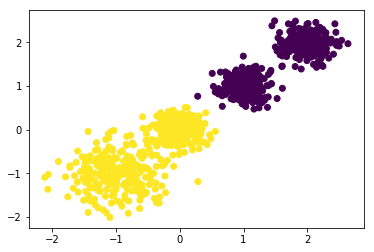

In [2]:
from sklearn.cluster import KMeans
y_pred=KMeans(n_clusters=2).fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)

In [3]:
from sklearn import metrics
metrics.calinski_harabaz_score(X,y_pred)

3116.1706763322227

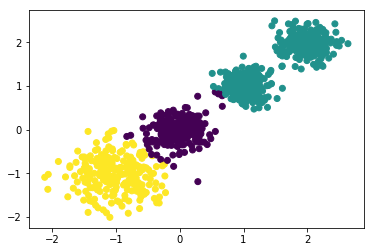

In [4]:
from sklearn.cluster import KMeans
y_pred=KMeans(n_clusters=3).fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)

In [5]:
metrics.calinski_harabaz_score(X,y_pred)

2931.625030199556

5924.050613480169

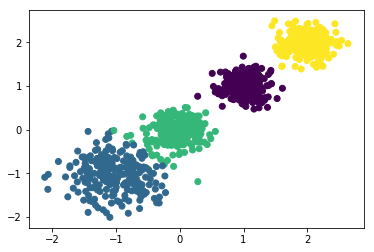

In [6]:
from sklearn.cluster import KMeans
y_pred=KMeans(n_clusters=4).fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)
metrics.calinski_harabaz_score(X,y_pred)

**总结：**
可见k=4的聚类分数比k=2和k=3都要高，这也符合我们的预期，我们的随机数据集也就是4个簇。当特征维度大于2，我们无法直接可视化聚类效果来肉眼观察时，用Calinski-Harabaz Index评估是一个很实用的方法。

#### MiniBatchKMeans

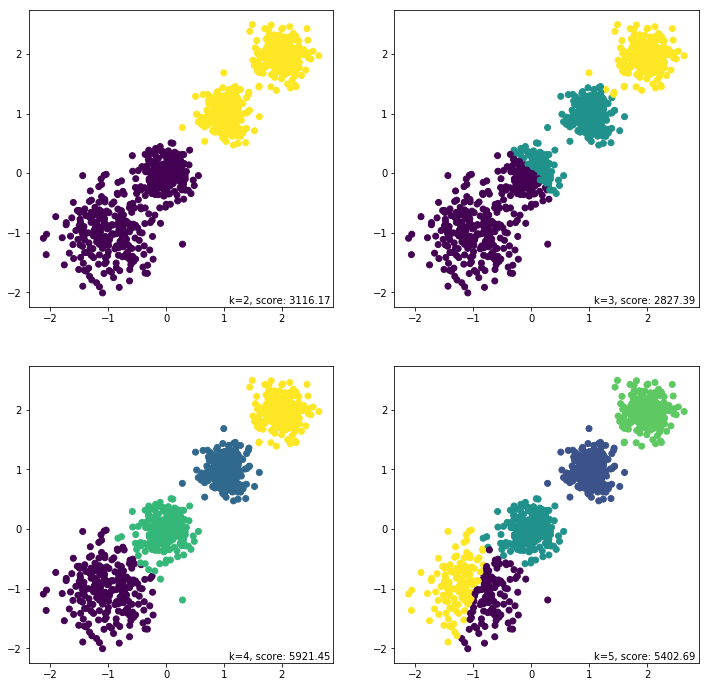

In [7]:
from sklearn.cluster import MiniBatchKMeans
plt.figure(figsize=(12,12))
for index, k in enumerate((2,3,4,5)):
    plt.subplot(2,2,index+1)
    y_pred = MiniBatchKMeans(n_clusters=k, batch_size = 200, random_state=9).fit_predict(X)
    score= metrics.calinski_harabaz_score(X, y_pred)  
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.text(.99, .01, ('k=%d, score: %.2f' % (k,score)),
                 transform=plt.gca().transAxes, size=10,
                 horizontalalignment='right')
plt.show()

# BIRCH算法
BIRCH的全称是利用层次方法的平衡迭代规约和聚类（Balanced Iterative Reducing and Clustering Using Hierarchies）。BIRCH算法比较适合于数据量大，类别数K也比较多的情况。它运行速度很快，只需要单遍扫描数据集就能进行聚类。

BIRCH算法利用了一个树结构来帮助我们快速的聚类，这个数结构类似于平衡B+树，一般将它称之为聚类特征树(Clustering Feature Tree，简称CF Tree)。这颗树的每一个节点是由若干个聚类特征(Clustering Feature，简称CF)组成。从下图我们可以看看聚类特征树是什么样子的：每个节点包括叶子节点都有若干个CF，而内部节点的CF有指向孩子节点的指针，所有的叶子节点用一个双向链表链接起来。
<img src="images/1042406-20161214141510979-1110473944.png">

## 聚类特征CF与聚类特征树CF Tree
在聚类特征树中，一个聚类特征CF是这样定义的：每一个CF是一个三元组，可以用（N，LS，SS）表示。其中N代表了这个CF中拥有的样本点的数量，这个好理解；LS代表了这个CF中拥有的样本点各特征维度的和向量，SS代表了这个CF中拥有的样本点各特征维度的平方和。
<img src="images/1042406-20161214142636542-611911122.png">

CF有一个很好的性质，就是满足线性关系，也就是CF1+CF2=(N1+N2,LS1+LS2,SS1+SS2)。这个性质从定义也很好理解。如果把这个性质放在CF Tree上，也就是说，在CF Tree中，对于每个父节点中的CF节点，它的(N,LS,SS)三元组的值等于这个CF节点所指向的所有子节点的三元组之和。如下图所示：
<img src="images/1042406-20161214143717151-481214189.png">

对于CF Tree，我们一般有几个重要参数，第一个参数是每个内部节点的最大CF数B，第二个参数是每个叶子节点的最大CF数L，第三个参数是针对叶子节点中某个CF中的样本点来说的，它是叶节点每个CF的最大样本半径阈值T，也就是说，在这个CF中的所有样本点一定要在半径小于T的一个超球体内。对于上图中的CF Tree，限定了B=7， L=5， 也就是说内部节点最多有7个CF，而叶子节点最多有5个CF。

## 聚类特征树CF Tree的生成
<table>
    <tr>
        <td><img src="images/1042406-20161214145741042-147956564.png"></td>
        <td><img src="images/1042406-20161214150223589-1415245002.png"></td>
        </tr>
        <tr>
        <td><img src="images/1042406-20161214150650073-546336265.png"></td>
            <td><img src="images/1042406-20161214150838964-947659827.png"></td>
        </tr>
        <tr>
        <td><img src="images/1042406-20161214151047042-954364496.png"></td>
            <td><img src="images/1042406-20161214151648229-501476357.png"></td>
        </tr>
        <tr>
        <td><img src="images/1042406-20161214152939667-962958903.png"></td>
            <td></td>
        </tr>
        <tr>
        <td></td>
        </tr>
</table>








总结下CF Tree的插入：

1. 从根节点向下寻找和新样本距离最近的叶子节点和叶子节点里最近的CF节点

2. 如果新样本加入后，这个CF节点对应的超球体半径仍然满足小于阈值T，则更新路径上所有的CF三元组，插入结束。否则转入3.

3. 如果当前叶子节点的CF节点个数小于阈值L，则创建一个新的CF节点，放入新样本，将新的CF节点放入这个叶子节点，更新路径上所有的CF三元组，插入结束。否则转入4。

4. 将当前叶子节点划分为两个新叶子节点，选择旧叶子节点中所有CF元组里超球体距离最远的两个CF元组，分布作为两个新叶子节点的第一个CF节点。将其他元组和新样本元组按照距离远近原则放入对应的叶子节点。依次向上检查父节点是否也要分裂，如果需要按和叶子节点分裂方式相同。

## BIRCH算法
BIRCH算法，其实将所有的训练集样本建立了CF Tree，一个基本的BIRCH算法就完成了，对应的输出就是若干个CF节点，每个节点里的样本点就是一个聚类的簇。也就是说BIRCH算法的主要过程，就是建立CF Tree的过程。

BIRCH算法的主要优点有：

1) 节约内存，所有的样本都在磁盘上，CF Tree仅仅存了CF节点和对应的指针。

2) 聚类速度快，只需要一遍扫描训练集就可以建立CF Tree，CF Tree的增删改都很快。

3) 可以识别噪音点，还可以对数据集进行初步分类的预处理

BIRCH算法的主要缺点有：

1) 由于CF Tree对每个节点的CF个数有限制，导致聚类的结果可能和真实的类别分布不同.

2) 对高维特征的数据聚类效果不好。此时可以选择Mini Batch K-Means

3) 如果数据集的分布簇不是类似于超球体，或者说不是凸的，则聚类效果不好。

## scikit-learn的BIRCH类
在scikit-learn中，BIRCH类的重要参数不多，下面一并讲解。
1.  threshold:即叶节点每个CF的最大样本半径阈值T，它决定了每个CF里所有样本形成的超球体的半径阈值。一般来说threshold越小，则CF Tree的建立阶段的规模会越大，即BIRCH算法第一阶段所花的时间和内存会越多。但是选择多大以达到聚类效果则需要通过调参决定。默认值是0.5.如果样本的方差较大，则一般需要增大这个默认值。

2.  branching_factor：即CF Tree内部节点的最大CF数B，以及叶子节点的最大CF数L。这里scikit-learn对这两个参数进行了统一取值。也就是说，branching_factor决定了CF Tree里所有节点的最大CF数。默认是50。如果样本量非常大，比如大于10万，则一般需要增大这个默认值。选择多大的branching_factor以达到聚类效果则需要通过和threshold一起调参决定

3. n_clusters：即类别数K，在BIRCH算法是可选的，如果类别数非常多，我们也没有先验知识，则一般输入None，此时BIRCH算法第4阶段不会运行。但是如果我们有类别的先验知识，则推荐输入这个可选的类别值。默认是3，即最终聚为3类。

4. compute_labels：布尔值，表示是否标示类别输出，默认是True。一般使用默认值挺好，这样可以看到聚类效果。

## 案例

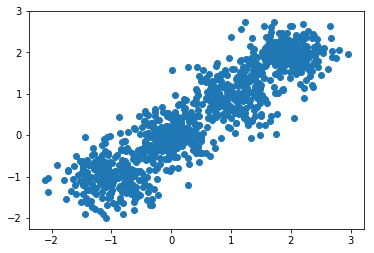

In [8]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1,-1], [0,0], [1,1], [2,2]], cluster_std=[0.4, 0.3, 0.4, 0.3], 
                  random_state =9)
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.show()

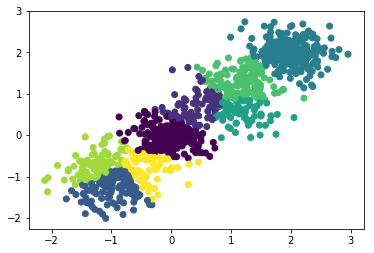

2220.952539045443

In [9]:
from sklearn.cluster import Birch
y_pred = Birch(n_clusters = None).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()
metrics.calinski_harabaz_score(X, y_pred)

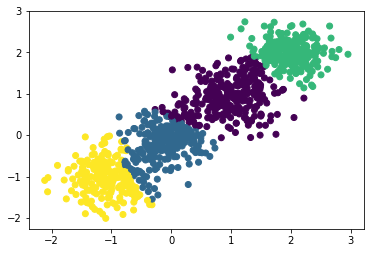

2816.407652684516

In [10]:
y_pred = Birch(n_clusters = 4).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()
metrics.calinski_harabaz_score(X, y_pred)

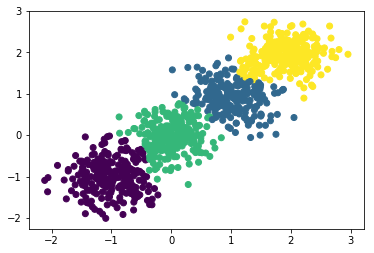

3295.634922726645

In [11]:
y_pred = Birch(n_clusters = 4,threshold=.3).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()
metrics.calinski_harabaz_score(X, y_pred)

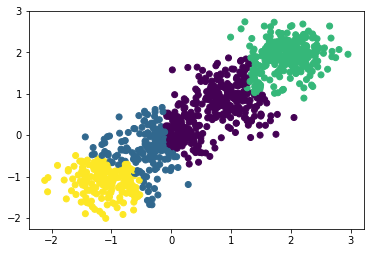

2155.10021807852

In [12]:
y_pred = Birch(n_clusters = 4,threshold=.1).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()
metrics.calinski_harabaz_score(X, y_pred)

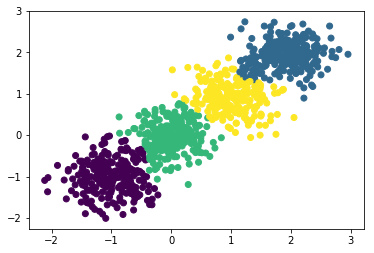

3301.8023106358173

In [13]:
y_pred = Birch(n_clusters = 4,threshold=.3,branching_factor=20).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()
metrics.calinski_harabaz_score(X, y_pred)

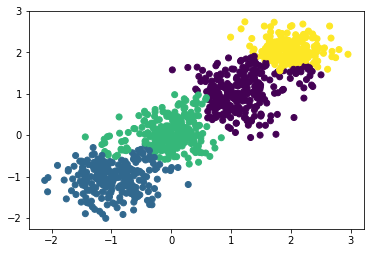

2800.878409621567

In [14]:
y_pred = Birch(n_clusters = 4,threshold=.3,branching_factor=10).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()
metrics.calinski_harabaz_score(X, y_pred)

# DBSCAN密度聚类算法
DBSCAN(Density-Based Spatial Clustering of Applications with Noise，具有噪声的基于密度的聚类方法)是一种很典型的密度聚类算法，和K-Means，BIRCH这些一般只适用于凸样本集的聚类相比，DBSCAN既可以适用于凸样本集，也可以适用于非凸样本集。这类密度聚类算法一般假定类别可以通过样本分布的紧密程度决定。同一类别的样本，他们之间的紧密相连的，也就是说，在该类别任意样本周围不远处一定有同类别的样本存在。

## DBSCAN密度定义
DBSCAN是基于一组邻域来描述样本集的紧密程度的，参数(ϵ, MinPts)用来描述邻域的样本分布紧密程度。其中，ϵ描述了某一样本的邻域距离阈值，MinPts描述了某一样本的距离为ϵ的邻域中样本个数的最小阈值。

假设我的样本集是$D=(x_1,x_2,...,x_m)$,则DBSCAN具体的密度描述定义如下：
1. $\epsilon$-邻域：对于$x_j∈D$，其ϵ-邻域包含样本集D中与$x_j$的距离不大于ϵ的子样本集，即$N_ϵ(x_j)={x_i∈D|distance(x_i,x_j)≤ϵ}$, 这个子样本集的个数记为$|N_ϵ(x_j)|$;
2. 核心对象：对于任一样本$x_j∈D$，如果其ϵ-邻域对应的$N_ϵ(x_j)$至少包含MinPts个样本，即如果$|N_ϵ(x_j)|≥MinPts$，则$x_j$是核心对象;
3. 密度直达：如果$x_i$位于$x_j$的ϵ-邻域中，且$x_j$是核心对象，则称$x_i$由$x_j$密度直达。注意反之不一定成立，即此时不能说$x_j$由$x_i$密度直达, 除非且$x_i$也是核心对象;
4. 密度可达：对于$x_i$和$x_j$,如果存在样本样本序列$p_1,p_2,...,p_T$,满足$p_1=x_i,p_T=x_j$, 且$p_{t+1}$由$p_t$密度直达，则称$x_j$由$x_i$密度可达。也就是说，密度可达满足传递性。此时序列中的传递样本$p_1,p_2,...,p_{T-1}$均为核心对象，因为只有核心对象才能使其他样本密度直达。注意密度可达也不满足对称性，这个可以由密度直达的不对称性得出;
5. 密度相连：对于$x_i$和$x_j$,如果存在核心对象样本$x_k$，使$x_i$和$x_j$均由$x_k$密度可达，则称$x_i$和$x_j$密度相连。注意密度相连关系是满足对称性的;

从下图可以很容易看出理解上述定义，图中MinPts=5，红色的点都是核心对象，因为其ϵ-邻域至少有5个样本。黑色的样本是非核心对象。所有核心对象密度直达的样本在以红色核心对象为中心的超球体内，如果不在超球体内，则不能密度直达。图中用绿色箭头连起来的核心对象组成了密度可达的样本序列。在这些密度可达的样本序列的ϵ-邻域内所有的样本相互都是密度相连的。
<img src="images/1042406-20161222112847323-1346197243.png">

## DBSCAN聚类算法
**DBSCAN聚类算法的流程:**

输入：样本集$D=(x_1,x_2,...,x_m)$，邻域参数(ϵ,MinPts), 样本距离度量方式；

输出： 簇划分C.　

步骤：

1. 初始化核心对象集合$\Omega=\Phi$, 初始化聚类簇数$k=0$，初始化未访问样本集合$\Gamma =D$,  簇划分$C=\Phi$;
2. 对于$j=1,2,...m$, 按下面的步骤找出所有的核心对象：
    1. 通过距离度量方式，找到样本$x_j$的ϵ-邻域子样本集$N_ϵ(x_j)$;
    2. 如果子样本集样本个数满足$|N_ϵ(x_j)|≥MinPt$, 将样本$x_j$加入核心对象样本集合：$\Omega=\Omega\cup\{x_j\}$;
3. 如果核心对象集合$\Omega=\Phi$，则算法结束，否则转入步骤4;
4. 在核心对象集合$\Omega$中，随机选择一个核心对象$o$，初始化当前簇核心对象队列$\Omega_{cur}=\{o\}$, 初始化类别序号k=k+1，初始化当前簇样本集合$C_k=\{o\}$, 更新未访问样本集合$\Gamma=\Gamma−\{o\}$;
5. 如果当前簇核心对象队列$\Omega_{cur}=\Phi$，则当前聚类簇$C_k$生成完毕, 更新簇划分$C=\{C_1,C_2,...,C_k\}$, 更新核心对象集合$\Omega=\Omega-C_k$， 转入步骤3;
6. 在当前簇核心对象队列$\Omega_{cur}$中取出一个核心对象$o′$,通过邻域距离阈值ϵ找出所有的ϵ-邻域子样本集$N_ϵ(o′)$，令$Δ=N_ϵ(o′)\cap\Gamma$, 更新当前簇样本集合$C_k=C_k\cup\Delta$, 更新未访问样本集合$\Gamma=\Gamma-\Delta$,  更新$\Omega_{cur}=\Omega_{cur}\cup(\Delta\cap\Omega)-o^{'}$，转入步骤5.

输出结果为： 簇划分$C=\{C_1,C_2,...,C_k\}$

## DBSCAN优缺点：
DBSCAN的主要优点有：
1. 可以对任意形状的稠密数据集进行聚类，相对的，K-Means之类的聚类算法一般只适用于凸数据集。
2. 可以在聚类的同时发现异常点，对数据集中的异常点不敏感。
3. 聚类结果没有偏倚，相对的，K-Means之类的聚类算法初始值对聚类结果有很大影响。

DBSCAN的主要缺点有：
1. 如果样本集的密度不均匀、聚类间距差相差很大时，聚类质量较差，这时用DBSCAN聚类一般不适合。
2. 如果样本集较大时，聚类收敛时间较长，此时可以对搜索最近邻时建立的KD树或者球树进行规模限制来改进。
3. 调参相对于传统的K-Means之类的聚类算法稍复杂，主要需要对距离阈值ϵ，邻域样本数阈值MinPts联合调参，不同的参数组合对最后的聚类效果有较大影响。

## scikit-learn中的DBSCAN类
### DBSCAN类重要参数
1. eps： DBSCAN算法参数，即我们的ϵ-邻域的距离阈值，和样本距离超过ϵ的样本点不在ϵ-邻域内。默认值是0.5.一般需要通过在多组值里面选择一个合适的阈值。eps过大，则更多的点会落在核心对象的ϵ-邻域，此时我们的类别数可能会减少， 本来不应该是一类的样本也会被划为一类。反之则类别数可能会增大，本来是一类的样本却被划分开。

2. min_samples： DBSCAN算法参数，即样本点要成为核心对象所需要的ϵ-邻域的样本数阈值。默认值是5. 一般需要通过在多组值里面选择一个合适的阈值。通常和eps一起调参。在eps一定的情况下，min_samples过大，则核心对象会过少，此时簇内部分本来是一类的样本可能会被标为噪音点，类别数也会变多。反之min_samples过小的话，则会产生大量的核心对象，可能会导致类别数过少。

3. metric：最近邻距离度量参数。可以使用的距离度量较多，一般来说DBSCAN使用默认的欧式距离（即p=2的闵可夫斯基距离）就可以满足我们的需求。可以使用的距离度量参数有：
    1. 欧式距离 “euclidean”:$\sqrt{\sum_i^n{(x_i-y_i)}^2}$;
    2. 曼哈顿距离 “manhattan”：$\sum_i^n{|x_i-y_i|}$;
    3. 切比雪夫距离“chebyshev”:$max|x_i-y_i|(i=1,2,\dots,n)$;
    4. 闵可夫斯基距离 “minkowski”: $\sqrt[p]{\sum_i^n{(x_i-y_i)}^p}$,p=1为曼哈顿距离，p=2为欧式距离;
    5. 带权重闵可夫斯基距离 “wminkowski”: $\sqrt[p]{\sum_i^n{w*|x_i-y_i|}^p}$,其中w为特征权重；
    6. 标准化欧式距离 “seuclidean”: 即对于各特征维度做了归一化以后的欧式距离。此时各样本特征维度的均值为0，方差为1；
    7. 马氏距离“mahalanobis”：$\sqrt{{(x-y)}^TS^{-1}(x-y)}$,其中，$S^{-1}$为样本协方差矩阵的逆矩阵。当样本分布独立时， S为单位矩阵，此时马氏距离等同于欧式距离;
4. algorithm：最近邻搜索算法参数，算法一共有三种，第一种是蛮力实现，第二种是KD树实现，第三种是球树实现;
5. leaf_size：最近邻搜索算法参数，为使用KD树或者球树时， 停止建子树的叶子节点数量的阈值。这个值越小，则生成的KD树或者球树就越大，层数越深，建树时间越长，反之，则生成的KD树或者球树会小，层数较浅，建树时间较短。默认是30. 因为这个值一般只影响算法的运行速度和使用内存大小，因此一般情况下可以不管它。
6.  p: 最近邻距离度量参数。只用于闵可夫斯基距离和带权重闵可夫斯基距离中p值的选择，p=1为曼哈顿距离， p=2为欧式距离。如果使用默认的欧式距离不需要管这个参数。

## 案例

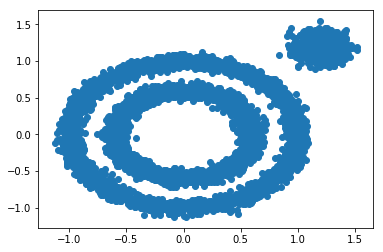

In [15]:
from sklearn import datasets
X1, y1=datasets.make_circles(n_samples=5000, factor=.6,noise=.05)
X2, y2 = datasets.make_blobs(n_samples=1000, n_features=2, centers=[[1.2,1.2]], cluster_std=[[.1]],random_state=9)
X = np.concatenate((X1, X2))
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.show()

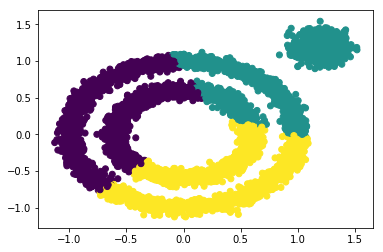

In [16]:
y_pred = KMeans(n_clusters=3).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

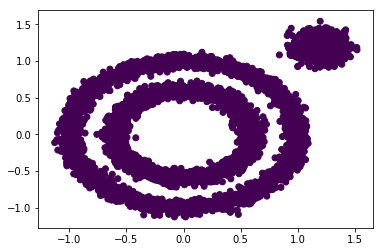

In [17]:
from sklearn.cluster import DBSCAN
y_pred=DBSCAN().fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)
plt.show()

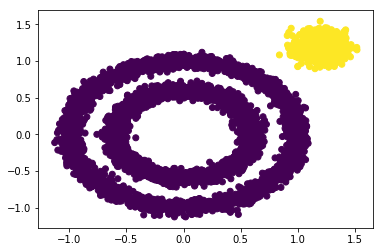

In [18]:
y_pred=DBSCAN(eps=.14).fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)
plt.show()

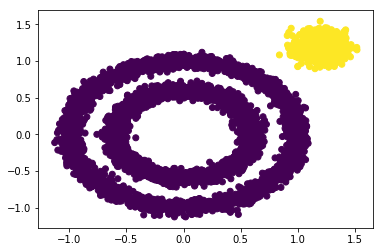

In [19]:
y_pred=DBSCAN(eps=.14,min_samples=50).fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)
plt.show()

# 谱聚类
谱聚类是从图论中演化出来的算法，后来在聚类中得到了广泛的应用。它的主要思想是把所有的数据看做空间中的点，这些点之间可以用边连接起来。距离较远的两个点之间的边权重值较低，而距离较近的两个点之间的边权重值较高，通过对所有数据点组成的图进行切图，让切图后不同的子图间边权重和尽可能的低，而子图内的边权重和尽可能的高，从而达到聚类的目的。
## 无向权重图
对于一个图$G$，我们一般用点的集合$V$和边的集合$E$来描述。即为$G(V,E)$。其中$V$即为我们数据集里面所有的点$(v_1,v_2,\dots,v_n)$。对于$V$中的任意两个点，可以有边连接，也可以没有边连接。我们定义权重$w_{ij}$为点$v_i$和点$v_j$之间的权重。由于我们是无向图，所以$w_{ij}=w_{ji}$。

对于有边连接的两个点$v_i$和$v_j$，$w_{ij}>0$,对于没有边连接的两个点$v_i$和$v_j$，$w_{ij}=0$。对于图中的任意一个点$v_i$，它的度$d_i$定义为和它相连的所有边的权重之和，即:

$$d_i=\sum_{j=1}^n{w_{ij}}$$

利用每个点度的定义，我们可以得到一个$nxn$的度矩阵$D$,它是一个对角矩阵，只有主对角线有值，对应第i行的第i个点的度数，定义如下：

$$D=\begin{bmatrix}d_1&\dots&\dots&\dots\\\dots&d_2&\dots&\dots\\\dots&\dots&\ddots&\dots\\\dots&\dots&\dots&d_n\end{bmatrix}$$

利用所有点之间的权重值，我们可以得到图的邻接矩阵$W$，它也是一个$nxn$的矩阵，第i行的第j个值对应我们的权重$w_{ij}$,如下：

$$W=\begin{bmatrix}w_{11}&\dots&w_{1n}\\\vdots&\ddots&\vdots\\w_{n1}&\dots&w_{nn}\end{bmatrix}$$

除此之外，对于点集$V$的的一个子集$A\subset V$，我们定义：

$$|A|:=子集A中点的个数\\vol(A):=\sum_{i\in A}d_i$$

## 相似矩阵
邻接矩阵$W$，它是由任意两点之间的权重值$w_{ij}组成的矩阵。权重值$w_{ij}的基本定性思想是，距离较远的两个点之间的边权重值较低，而距离较近的两个点之间的边权重值较高。定量构建邻接矩阵$W$的方法有三类：$\epsilon$-邻近法，K邻近法和全连接法。

### **$\epsilon$-邻近法**
它设置了一个距离阈值$\epsilon$，然后用欧式距离$s_{ij}$度量任意两点$x_i$和$x_j$的距离。即相似矩阵的$s_{ij}={||x_i−x_j||}_2^2$,  然后根据$s_{ij}$和$\epsilon$的大小关系，来定义邻接矩阵$W$如下：

$$w_{ij}=\begin{cases}0&s_{ij}>\epsilon\\\epsilon&s_{ij}\leq\epsilon\end{cases}$$

### **K邻近法:**
第一种K邻近法是只要一个点在另一个点的K近邻中，则保留$s_{ij}$

$$w_{ij}=w_{ji}=\begin{cases}0&x_i\not \in KNN(x_j)&and&x_j\not\in KNN(x_i)\\exp(-\frac{{||x_i-x_j||}^2_2}{2\sigma^2})&x_i\in KNN(x_j)&or&x_j\in KNN(x_i)\end{cases}$$

第二种K邻近法是必须两个点互为K近邻中，才能保留$s_{ij}$

$$w_{ij}=w_{ji}=\begin{cases}0&x_i\not \in KNN(x_j)&or&x_j\not\in KNN(x_i)\\exp(-\frac{{||x_i-x_j||}^2_2}{2\sigma^2})&x_i\in KNN(x_j)&and&x_j\in KNN(x_i)\end{cases}$$

### 全连接法
相比前两种方法，第三种方法所有的点之间的权重值都大于0，因此称之为全连接法。

$$w_{ij}=s_{ij}=exp(-\frac{{||x_i-x_j||}^2_2}{2\sigma^2})$$

在实际的应用中，使用第三种全连接法来建立邻接矩阵是最普遍的。

## 无向图切图
对于无向图$G$的切图，我们的目标是将图$G(V,E)$切成相互没有连接的$k$个子图，每个子图点的集合为：$A_1,A_2,\dots,A_k$，它们满足$A_i\cap A_j=\Phi$,且$A_1\cup A_2\dots\cup A_k=V$。

对于任意两个子图点的集合$A,B\subset V, A\cap B=\Phi$, 我们定义$A和B$之间的切图权重为：

$$W(A,B)=\sum_{i\in A,j\in B}w_{ij}$$

那么对于我们k个子图点的集合：$A_1,A_2,\dots,A_k$，我们定义切图cut为：

$$cut(A_1,A_2,\dots,A_k)=\frac{1}{2}\sum_{i=1}^kW(A_i,\bar{A_i})$$

其中$\bar{A_i}$为$A_i$的补集，意为除$A_i$子集外其他$V$的子集的并集。

我们的目标就是最小化$cut(A_1,A_2,\dots,A_k)$
## 拉普拉斯矩阵
拉普拉斯矩阵$L=D-W$;
拉普拉斯矩阵有一些很好的性质如下：
1. 拉普拉斯矩阵是对称矩阵，这可以由$D和W$都是对称矩阵而得。
2. 由于拉普拉斯矩阵是对称矩阵，则它的所有的特征值都是实数。
3. 对于任意的向量$f$,我们有

$\large f^TLf$$\large=f^TDf-f^TWf\\\large=\sum_{i=1}^n{d_if_i^2}-\sum_{i,j=1}^n{w_{ij}f_if_j}\\\large=\frac{1}{2}(\sum_{j=1}^n{d_jf_j^2}-2\sum_{i,j=1}^n{w_{ij}f_if_j}+\sum_{i=1}^n{d_if_i^2})\\\large=\frac{1}{2}\sum_{i,j=1}^n{w_{ij}{(f_i-f_j)}^2}$

4. 拉普拉斯矩阵是半正定的，且对应的n个实数特征值都大于等于0，即$0=\lambda_1\leq\dots\leq\lambda_n$，且最小的特征值为0，这个由性质3可以得出；

## 切图聚类
回顾切图目标：“切图后不同的子图间边权重和尽可能的低，而子图内的边权重和尽可能的高”，那么我们前面定义的$cut$最小化目标，忽略了子图内权重和尽可能高的要素。以下两种切图方式较为完善的考虑这些，第一种是RatioCut，第二种是Ncut。
### RatioCut
最小化下式：
$$RatioCut(A_1,A_2,\dots,A_k)=\frac{1}{2}\sum_{i=1}^{k}\frac{W(A_i,\bar{A_i})}{|A_i|}$$

引入指示向量$h_j\in \{h_1,\dots,h_k\},j=1,\dots,k$对于任意一个向量$h_j$，是一个$n$维向量($n$为样本数),我们定义$h_{ij}$如下：
$$h_{ij}=\begin{cases}0&v_i\not\in A_j\\\frac{1}{\sqrt{|A_j|}}&v_i\in A_j\end{cases}$$

可以推导如下：

$\large h_i^TLh_i$
$
\\\large =\frac{1}{2}\sum_{m=1}\sum_{n=1}w_{mn}{(h_{im}-h_{in})}^2
\\\large =\frac{1}{2}(\sum_{m\in A_i,n\not\in A_i}{w_mn{(\frac{1}{\sqrt{|A_i|}}-0)}^2}+\sum_{m\not\in A_i,n\in A_i}{w_mn{(0-\frac{1}{\sqrt{|A_i|}})}^2})
\\\large =\frac{1}{2}(\sum_{m\in A_i,n\not\in A_i}{w_{mn}\frac{1}{|A_i|}}+\sum_{m\not\in A_i,n\in A_i}{w_{mn}\frac{1}{|A_i|}})
\\\large =\frac{1}{2}(cut(A_i,\bar{A_i})\frac{1}{|A_i|}+cut(\bar{A_i},A_i)\frac{1}{|A_i|})
\\\large =\frac{cut(A_i,\bar{A_i})}{|A_i|}
$

**那么：**

$\because RatioCut(A_1,A_2,\dots,A_k)
\\=\frac{1}{2}\sum_{i=1}^{k}\frac{W(A_i,\bar{A_i})}{|A_i|},(根据RatioCut定义)
\\=\sum_{i=1}^{k}\frac{cut(A_i,\bar{A_i})}{|A_i|}，（根据cut定义）
\\=\sum_{i=1}^{k}h_i^TLh_i，（根据上述推导）
\\=tr({H^TLH})（矩阵的迹）
\\\because H^TH=I（单位矩阵）
\\\to 我们的切图优化目标为：
\\\large{\overset{\underbrace{argmin({tr({H^TLH})})}}{H}},s.t.H^TH=I
$
### Ncut
$$NCut(A_1,A_2,\dots,A_k)=\frac{1}{2}\sum_{i=1}^{k}\frac{W(A_i,\bar{A_i})}{vol(A_i)}$$

$NCut$切图使用子图权重$\frac{1}{\sqrt{vol(A_j)}}$来表示指示向量$h$,如下：

$$h_{ij}=\begin{cases}0&v_i\not\in A_j\\\frac{1}{\sqrt{vol(A_j)}}&v_i\in A_j\end{cases}$$

可以推导如下：

$\large h_i^TLh_i$
$
\\\large =\frac{1}{2}\sum_{m=1}\sum_{n=1}w_{mn}{(h_{im}-h_{in})}^2
\\\large =\frac{1}{2}(\sum_{m\in A_i,n\not\in A_i}{w_mn{(\frac{1}{\sqrt{vol(A_i)}}-0)}^2}+\sum_{m\not\in A_i,n\in A_i}{w_mn{(0-\frac{1}{\sqrt{vol(A_i)}})}^2})
\\\large =\frac{1}{2}(\sum_{m\in A_i,n\not\in A_i}{w_{mn}\frac{1}{vol(A_i)}}+\sum_{m\not\in A_i,n\in A_i}{w_{mn}\frac{1}{vol(A_i)}})
\\\large =\frac{1}{2}(cut(A_i,\bar{A_i})\frac{1}{vol(A_i)}+cut(\bar{A_i},A_i)\frac{1}{vol(A_i)})
\\\large =\frac{cut(A_i,\bar{A_i})}{vol(A_i)}
$

推导方式和RatioCut完全一致。

**那么：**

$RatioCut(A_1,A_2,\dots,A_k)
\\=tr({H^TLH})（矩阵的迹）
\\此时 H^TH\not =I,而是H^TDH=I
\\\to 也就是说切图优化目标为：
\\\large{\overset{\underbrace{argmin({tr({H^TLH})})}}{H}},s.t.H^TDH=I
\\ 我们令H=D^{\frac{-1}{2}}F,则H^TLH=F^TD^{\frac{-1}{2}}LD^{\frac{-1}{2}}F,H^TDH=F^TF=I,优化目标变为
\\\large{\overset{\underbrace{argmin({tr({F^TD^{\frac{-1}{2}}LD^{\frac{-1}{2}}F})})}}{F}},s.t.F^TF=I
$

## 谱聚类算法流程
1. 根据输入的相似矩阵的生成方式构建样本的相似矩阵S
2. 根据相似矩阵S构建邻接矩阵W，构建度矩阵D
3. 计算出拉普拉斯矩阵L
4. 构建标准化后的拉普拉斯矩阵$D^{\frac{-1}{2}}LD^{\frac{-1}{2}}$
5. 计算$D^{\frac{-1}{2}}LD^{\frac{-1}{2}}$最小的$k_1$个特征值所各自对应的特征向量$f$
6. 将各自对应的特征向量$f$组成的矩阵按行标准化，最终组成$n×k_1$维的特征矩阵$F$
7. 对$F$中的每一行作为一个$k_1$维的样本，共$n$个样本，用输入的聚类方法进行聚类，聚类维数为$k_2$。
8. 得到簇划分$C(c_1,c_2,\dots,c_{k_2})$.　　　　

## 谱聚类算法特点
**优点：**
1. 谱聚类只需要数据之间的相似度矩阵，因此对于处理稀疏数据的聚类很有效。这点传统聚类算法比如K-Means很难做到
2. 由于使用了降维，因此在处理高维数据聚类时的复杂度比传统聚类算法好。

**缺点：**
1. 如果最终聚类的维度非常高，则由于降维的幅度不够，谱聚类的运行速度和最后的聚类效果均不好。
2. 聚类效果依赖于相似矩阵，不同的相似矩阵得到的最终聚类效果可能很不同。

## scikit-learn谱聚类
在scikit-learn的类库中，sklearn.cluster.SpectralClustering实现了基于Ncut的谱聚类，没有实现基于RatioCut的切图聚类。同时，对于相似矩阵的建立，也只是实现了基于K邻近法和全连接法的方式，没有基于ϵ-邻近法的相似矩阵。最后一步的聚类方法则提供了两种，K-Means算法和 discretize算法。

**SpectralClustering重要参数与调参注意事项：**
1. n_clusters：代表我们在对谱聚类切图时降维到的维数（$k_1$）,同时也是最后一步聚类算法聚类到的维数($k_2$);
2. affinity: 也就是我们的相似矩阵的建立方式.可以选择的方式有三类，第一类是 'nearest_neighbors'即K邻近法。第二类是'precomputed'即自定义相似矩阵.第三类是全连接法;
3. 核函数参数gamma:如果我们在affinity参数使用了多项式核函数 'poly'，高斯核函数‘rbf’, 或者'sigmoid'核函数，那么我们就需要对这个参数进行调参。
4. 核函数参数degree：如果我们在affinity参数使用了多项式核函数 'poly'，那么我们就需要对这个参数进行调参。
5. 核函数参数coef0: 如果我们在affinity参数使用了多项式核函数 'poly'，或者sigmoid核函数，那么我们就需要对这个参数进行调参。
6. kernel_params：如果affinity参数使用了自定义的核函数，则需要通过这个参数传入核函数的参数。
7. n_neighbors: 如果我们affinity参数指定为'nearest_neighbors'即K邻近法，则我们可以通过这个参数指定KNN算法的K的个数。
8. eigen_solver:在降维计算特征值特征向量的时候，使用的工具。有 None, ‘arpack’, ‘lobpcg’, 和‘amg’4种选择。
9. eigen_tol：如果eigen_solver使用了arpack’，则需要通过eigen_tol指定矩阵分解停止条件。
10. assign_labels：即最后的聚类方法的选择，有K-Means算法和 discretize算法两种算法可以选择。
11. n_init：即使用K-Means时用不同的初始值组合跑K-Means聚类的次数，这个和K-Means类里面n_init的意义完全相同


从上面的介绍可以看出，需要调参的部分除了最后的类别数n_clusters，主要是相似矩阵affinity的选择，以及对应的相似矩阵参数。当我选定一个相似矩阵构建方法后，调参的过程就是对应的参数交叉选择的过程。对于K邻近法，需要对n_neighbors进行调参，对于全连接法里面最常用的高斯核函数rbf，则需要对gamma进行调参。

## 实例

In [32]:
X, y = datasets.make_blobs(n_samples=500, n_features=6, centers=5, cluster_std=[0.4, 0.3, 0.4, 0.3, 0.4], random_state=0)

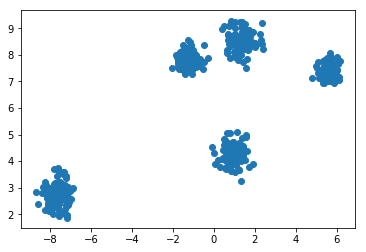

In [33]:
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.show()

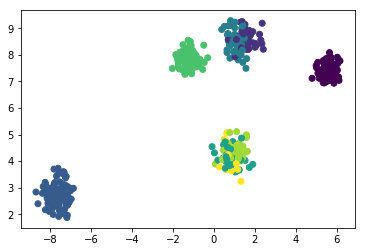

In [34]:
from sklearn.cluster import SpectralClustering
y_pred = SpectralClustering().fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)
plt.show()

In [35]:
metrics.calinski_harabaz_score(X, y_pred)

16475.903128232865

In [36]:
for index, gamma in enumerate((0.01,0.1,1,10)):
    for index, k in enumerate((3,4,5,6)):
        y_pred = SpectralClustering(n_clusters=k, gamma=gamma).fit_predict(X)
        print("Score with gamma=", gamma, "n_clusters=", k,"score:", metrics.calinski_harabaz_score(X, y_pred))

Score with gamma= 0.01 n_clusters= 3 score: 1017.2286850588473
Score with gamma= 0.01 n_clusters= 4 score: 1834.8634430326551
Score with gamma= 0.01 n_clusters= 5 score: 25942.55920711236
Score with gamma= 0.01 n_clusters= 6 score: 21596.534173112905
Score with gamma= 0.1 n_clusters= 3 score: 1017.2286850588473
Score with gamma= 0.1 n_clusters= 4 score: 1834.8634430326556
Score with gamma= 0.1 n_clusters= 5 score: 25942.55920711236
Score with gamma= 0.1 n_clusters= 6 score: 21491.45230385383
Score with gamma= 1 n_clusters= 3 score: 222.65792231194072
Score with gamma= 1 n_clusters= 4 score: 1172.564102104965
Score with gamma= 1 n_clusters= 5 score: 25942.55920711236
Score with gamma= 1 n_clusters= 6 score: 21565.189165961507


d:\env\pythonve\test36\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
d:\env\pythonve\test36\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
d:\env\pythonve\test36\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Score with gamma= 10 n_clusters= 3 score: 147.63675915465362
Score with gamma= 10 n_clusters= 4 score: 1834.8634430326551
Score with gamma= 10 n_clusters= 5 score: 25942.55920711236
Score with gamma= 10 n_clusters= 6 score: 20873.98976240194


d:\env\pythonve\test36\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


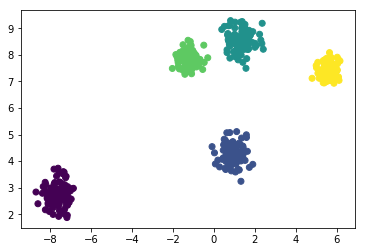

25942.559207112365

In [37]:
y_pred = SpectralClustering(n_clusters=5, gamma=.01).fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)
plt.show()
metrics.calinski_harabaz_score(X, y_pred)

# sklearn中聚类方法实例对比
<img src="images/sphx_glr_plot_cluster_comparison_001.png">